# <center> Diabetes Prediction By Using Decision Tree


# Objective :

### Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables:


# Features/ varibles of the Project :

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
   based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


---


## THE STEPS THAT I GOING TO FOLLOW


#### 1. Importing Required Libraries

#### 2. Loading the Dataset

#### 3. Exploratory Data Analysis

##### a. Understanding the dataset

- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set
- correlation

#### b. Data Cleaning

- checking NUll values
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value

### 4. Data Visualization

#### 5. Feature Selection

#### 6. Handling Outliers

#### 7. Split the Data Frame into X and y

#### 8. TRAIN TEST SPLIT

### 9. Build the Decision tree algorithm

#### 10 Train and Predict and analyze the model


---


# <center> Works starts now


In [147]:
# import all essential libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plot chart
import seaborn as sns #used for data visualization

import warnings #avoid warning flash
warnings.filterwarnings('ignore')



# Loading the Dataset


In [148]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis


In [150]:
# tell about the rows and columns  in the dataset
df.shape 

(768, 9)

In [151]:
# tell about the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [152]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [153]:
df['BMI'] = df['BMI'].astype('int64')
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('int64')
# # df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df['Pregnancies'] = df['Pregnancies'].replace([np.inf, -np.inf],df['Pregnancies'].mean(), inplace=True)

In [154]:
# information about the datstet

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


# Descriptive Analysis


In [155]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


# Insights from the descriptive Analysis


- Minimum age is 21 which having diabetes
- Maximum age is 81 which having diabetes

## Conclusion:->

#### We are observing that Minimum value of Glucose ,BloodPressure, Insulin, BMI is 0 which is impossible so we can say that data is missing So Data Cleaning Process is Essential.

#### Insulin level is 846 . which mean outliers is present so we have to handle it.


---


# <center> Data Cleaning


In [156]:
# drop duplicates if any 
# df.duplicated()  to check the duplicated values in the dataframe
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0,63,0
764,2,122,70,27,0,36,0,27,0
765,5,121,72,23,112,26,0,30,0
766,1,126,60,0,0,30,0,47,1


In [157]:
# check Null Values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Insigths

- There is No NULL value


---


### Count total 0s in those features which having the 0s


In [158]:
# counting the missing value
print(df[df['Glucose']==0].shape[0]) 
print(df[df['BloodPressure']==0].shape[0])
print(df[df['BMI']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])

5
35
11
227
374


In [159]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

---


##### Visualization to Replace 0 from the essential features like BMI, Glucose ...etc except Pregnancies


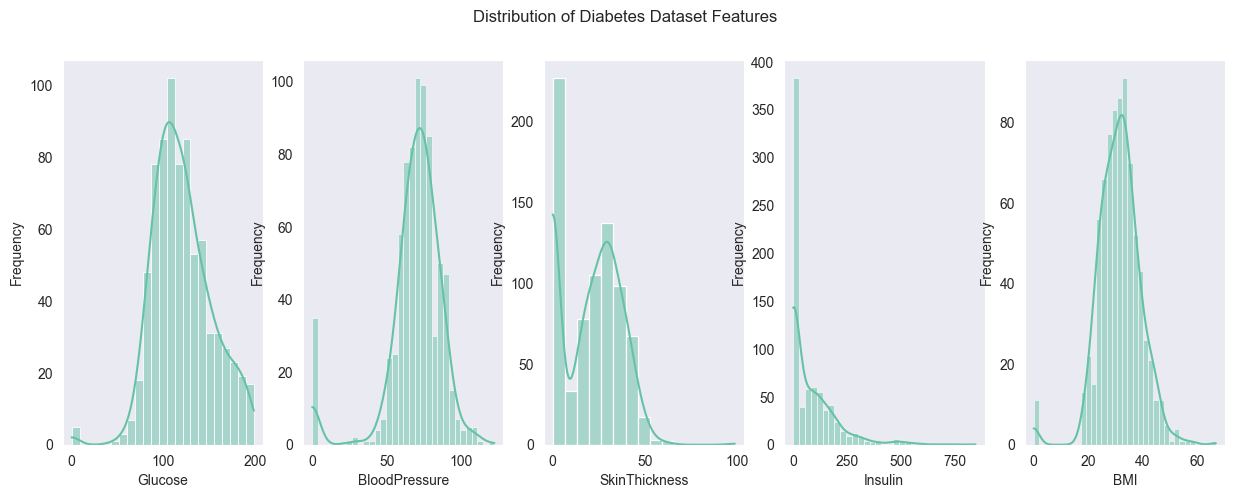

In [160]:
# define the columns to plot
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# create a figure with multiple subplots
fig, axs = plt.subplots(ncols=len(columns), figsize=(15,5))

# iterate over the columns and plot the distribution
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], kde=True)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Frequency")

# set the title of the figure
fig.suptitle("Distribution of Diabetes Dataset Features")

# display the plot
plt.show()

### From the distribution graph we observe some insights to handle "0s"

- Gluocose and Blood Pressure graph is normally distributed so we use Mean Imputation

- SkinThickness , Insulin, BMI graph is skewed distribution so we use Median Imputation.


In [161]:
#replacing 0 by mean
df['Glucose']= df['Glucose'].replace(0, df['Glucose'].mean()) 

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

# replacing 0 by median

df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())





# Handle outliers

## outliers

- outlier is a data point that is significantly different from other data points in a dataset.

### Effect of Outlier

- Outliers can significantly impact the coefficients of the model, which can lead to incorrect predictions.

- first we see outliers using the Boxplot


<Axes: xlabel='Age'>

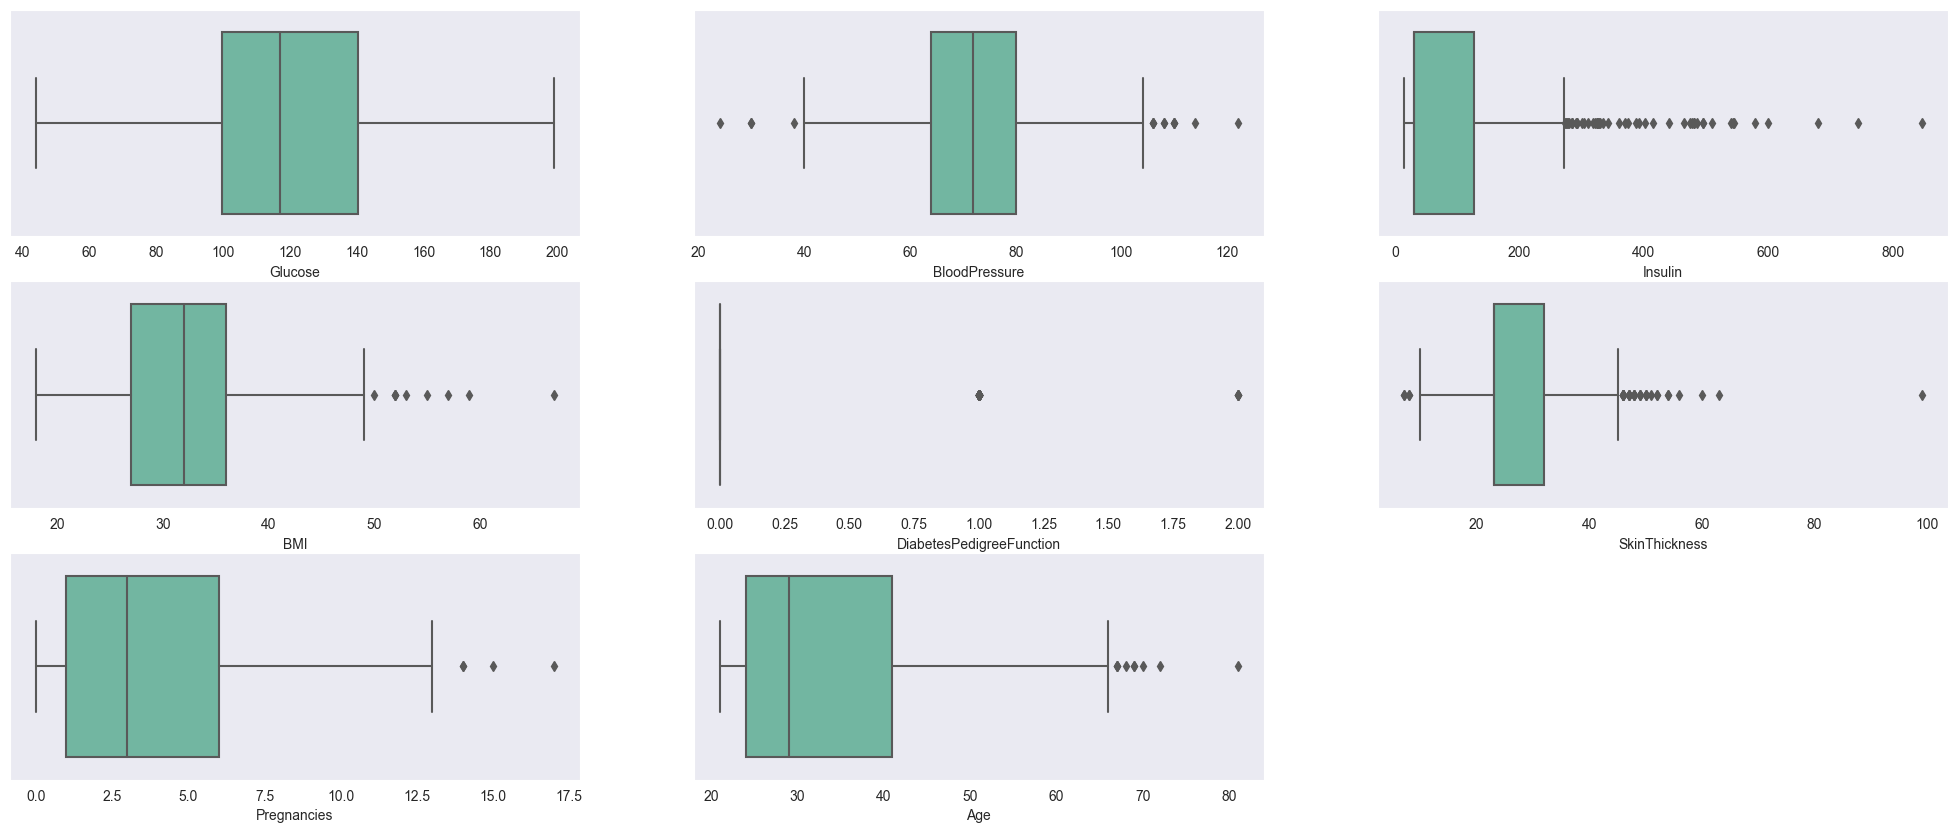

In [162]:
# box plot to visualize the outliers

plt.figure(figsize=(25,10))
colors = sns.color_palette('Set2', 2)
sns.set_palette(colors)

sns.set_style(style='dark')

plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='Age',data=df)


# Checking which feature is important  that is  Correlation  

<Axes: >

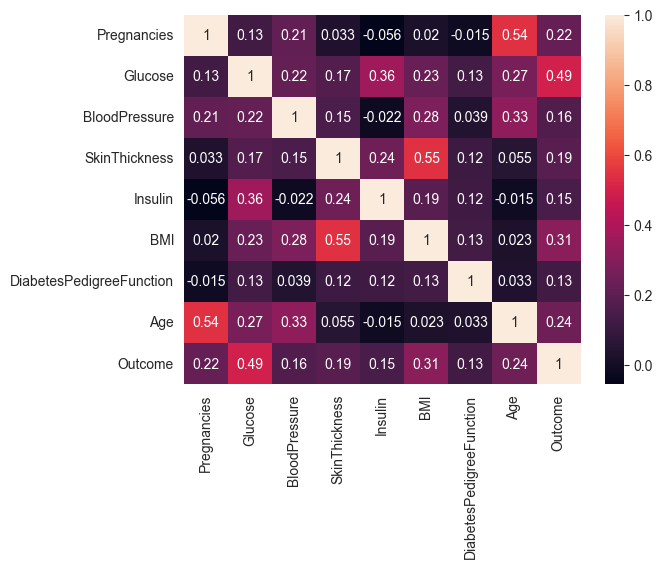

In [163]:
sns.heatmap(df.corr(), annot = True)

# Insights from heatmap
- BloodPressure','Insulin','DiabetesPedigreeFunction these features are not too much important.

In [164]:
# df_cpy =df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

## <center> Handling Outliers using the Transformer</center>

- Transformation:
  transform the data so that extreme values are brought closer to the center of the distribution. Common transformations include the logarithmic, square root, and inverse transformations.
  The choice of transformation depends on the nature of the data and the goal of the analysis.

### we are using the logarithmic transformation


In [165]:
# df['Pregnancies'] = np.log(df['Pregnancies'])
# df['Glucose'] = np.log(df['Glucose'])
# df['BloodPressure'] = np.log(df['BloodPressure'])
# df['SkinThickness'] = np.log(df['SkinThickness'])
# df['Insulin'] = np.log(df['Insulin'])
# df['BMI'] = np.log(df['BMI'])
# df['Age'] = np.log(df['Age'])





## We are handling the ouliers using the median imputatuion

In [166]:
# define a function to handle outliers using median
def handle_outliers_median(data, columns):
    for column in columns:
        median = data[column].median()
        std = data[column].std()
        lower_bound = median - 3 * std
        upper_bound = median + 3 * std
        data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

# define the columns to handle outliers
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# handle outliers using median
df = handle_outliers_median(df, columns)

# Visualization after handling the outliers


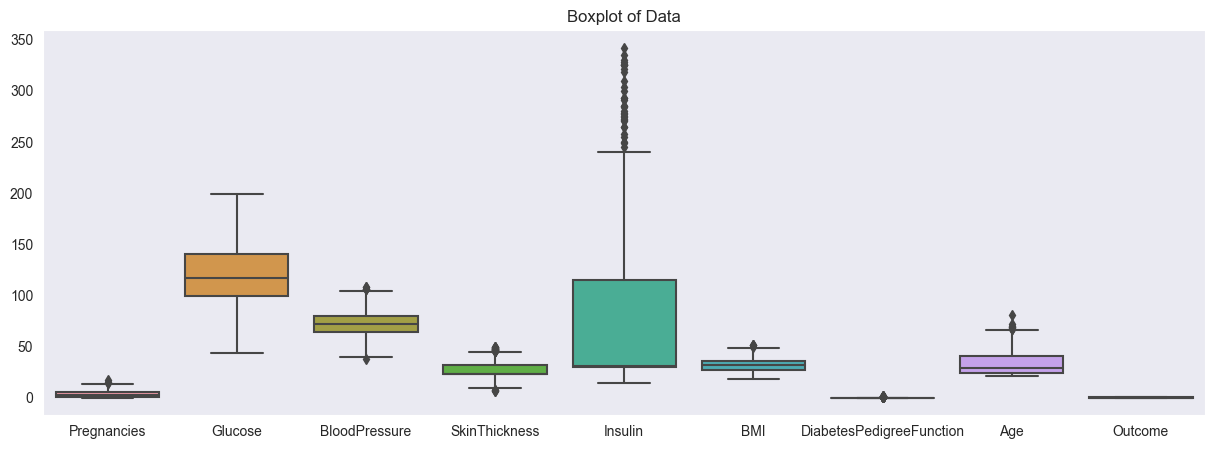

In [167]:
fig, ax = plt.subplots(figsize=(15,5))

# create the boxplot using Seaborn
sns.boxplot(data=df, ax=ax)

# set the title of the plot
ax.set_title("Boxplot of Data")

# display the plot
plt.show()

In [168]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(df)

###  <center>   Independent and Dependent variables


In [169]:
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.0,0,50
1,1,85.0,66.0,29.0,30.5,26.0,0,31
2,8,183.0,64.0,23.0,30.5,23.0,0,32
3,1,89.0,66.0,23.0,94.0,28.0,0,21
4,0,137.0,40.0,35.0,168.0,43.0,2,33


In [170]:
# Dependent feature

y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## <center> Train Test Split 

- Train data : used to train the model 
- Test data : used to evaluate the model 

Train: 67% data for tatin , Test: 33% 

In [171]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)




In [172]:
X_train.shape , y_train.shape

((514, 8), (514,))

In [173]:
X_test.shape , y_test.shape

((254, 8), (254,))

# <center> DECISION TREE ALGO TO TRAIN THE MODEL

In [174]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix 



## ID3 Decision Tree algo : (entropy)
ID3 (Iterative Dichotomiser 3) is a decision tree algorithm developed by Ross Quinlan in 1986. It uses the concept of information entropy to determine the best attribute to split the data at each node. The algorithm selects the attribute that results in the greatest reduction in entropy or the most information gain.


## C4.5:( gini) algo 
C4.5 is an improved version of the ID3 algorithm, also developed by Ross Quinlan. C4.5 improves upon ID3 by handling both continuous and discrete attributes, dealing with missing values, and providing the ability to prune the decision tree to avoid overfitting. Instead of information gain, C4.5 uses gain ratio, which takes into account the number of branches that a split produces, to select the best attribute at each node.



### Implementation

## define the hyperparameters to tune 

```
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
```

In [175]:
# Create the parameter grid based on the results of random search

model = DecisionTreeClassifier(random_state=42)

params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120]
    
}

grid = GridSearchCV(estimator= model, param_grid=params, cv = 5,verbose =2)

Train_model = grid.fit(X_train, y_train)

Train_model




Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100, 120]},
             verbose=2)

In [176]:
#check best parameters

Train_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}

##  Finally Now Train the Model using the hyperparameter tunning's parameters

In [177]:
# Initialize decision tree classifier with specified hyperparameters
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

In [178]:
# Fit the decision tree model on the training set
dtc_model = dtc.fit(X_train, y_train)

# Prediction 

In [179]:
y_pred = dtc_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

--------

# <center> Accuracy , Classification Report , Confusion matrix, F1 SCore, Precision , Recall.

In [180]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score , roc_curve ,auc




In [181]:
print("The Accuracy of the model is :",accuracy_score(y_test, y_pred))

print("\n")
print("The Confusion matrix is :", confusion_matrix(y_test, y_pred))
print("\n")

print("The classification report is :", classification_report(y_test,y_pred))

The Accuracy of the model is : 0.7165354330708661


The Confusion matrix is : [[130  38]
 [ 34  52]]


The classification report is :               precision    recall  f1-score   support

           0       0.79      0.77      0.78       168
           1       0.58      0.60      0.59        86

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



### <center> CONFUSION MATRIX AND ROC CURVE

Text(0.5, 1.0, 'confusion_matrix')

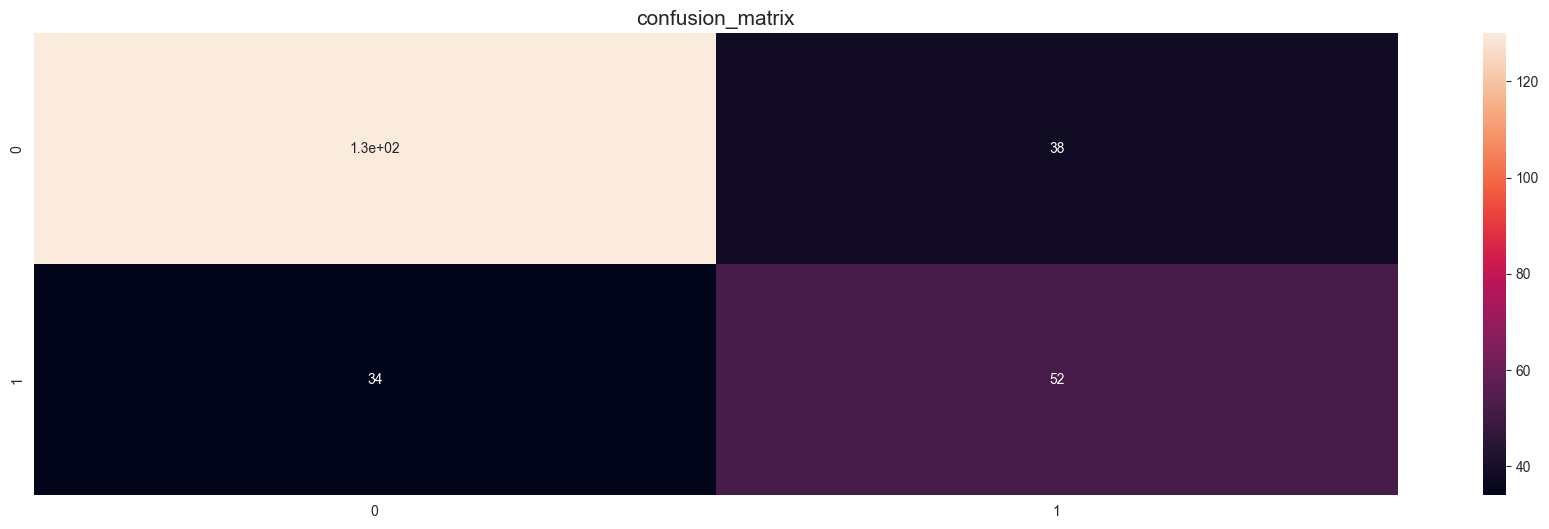

In [182]:
fig, ax = plt.subplots(figsize=(22,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True , ax =ax)
ax.set_title('confusion_matrix', fontsize = 15 )

#<center> ROC CURVE

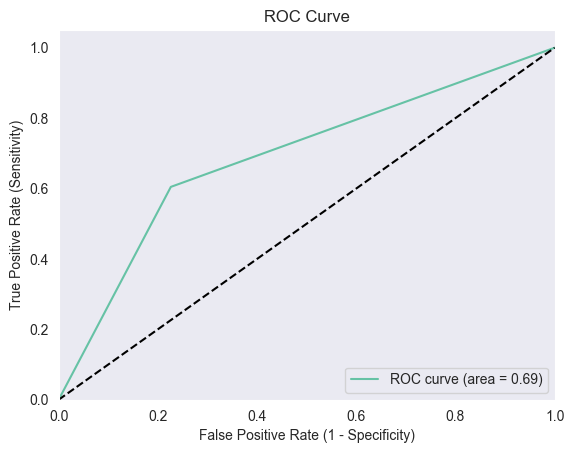

In [183]:
# calculate the false positive rate (fpr), true positive rate (tpr), and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## <center> F1 Score , Precision, Recall

In [184]:
print("The f1 Score is:\n" , f1_score(y_test,y_pred))


print("The Precision score is:\n" , precision_score(y_test,y_pred))

print("The recall score is:\n" , recall_score(y_test,y_pred))

The f1 Score is:
 0.5909090909090908
The Precision score is:
 0.5777777777777777
The recall score is:
 0.6046511627906976


# DECISION TREE FIGURE

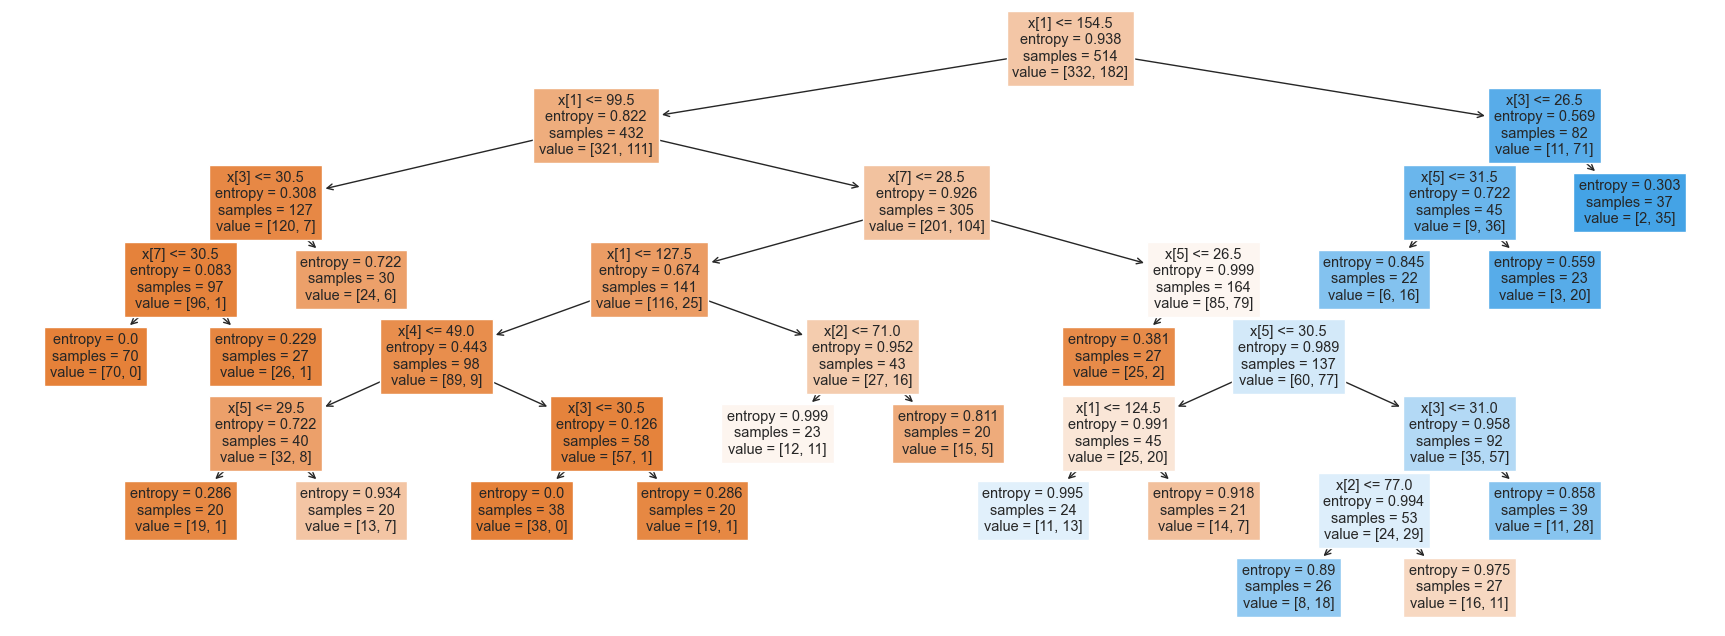

In [185]:
plt.figure(figsize=(22,8))
plot_tree(dtc, filled=True)
plt.show()